In [183]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import asarray
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense,Flatten
import numpy as np
import matplotlib.pyplot as plt

In [184]:
columns=["symboling", "normalized-losses","make","fuel-type",
         "aspiration","num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base",
         "length", "width","height","curb-weight",
         "engine-type","num-of-cylinder",
         "engine-size","fuel-system","bore","stroke",
         "compression-ratio","horsepower","peak-rpm","city-mpg",
         "highway-mpg", "price"
]

In [185]:
len(columns)

26

In [186]:
df=pd.read_csv("car_prices.csv" ,names=columns)
df=df.dropna(subset=["price"])
#df=df[df["price"] != '?']
#df['price']=df['price'].astype(float)
for column in ['price','wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']:
    df=df[df[column] != '?']
    df[column]=df[column].astype(float)
print(df.head(2))
print(np.array(df['price']))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...        130.0   
1  convertible          rwd           front        88.6  ...        130.0   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0      111.0    5000.0     21.0   
1         mpfi  3.47    2.68               9.0      111.0    5000.0     21.0   

   highway-mpg    price  
0         27.0  13495.0  
1         27.0  16500.0  

[2 rows x 26 columns]
[13495. 16500. 16500. 13950. 17450. 15250. 17710. 18920. 23875. 16430.
 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.  6575.
  5572.  6377.  7957.  6229.  6692.  760

In [187]:
encoder=LabelEncoder()

df["make_enc"]=encoder.fit_transform(df["make"])

#print(asarray(df["make"][0:200]))

def one_hot_encode(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, axis=1, inplace=True)
    return df

df_final=one_hot_encode(df,["make","fuel-type","drive-wheels","engine-location",
                            "aspiration","num-of-cylinder","num-of-doors","fuel-system",
                            "body-style","engine-type"])
print(df_final)

def convert_to_numeric(df, column_list):
    for col in column_list:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df_numeric=convert_to_numeric(df_final,df_final.columns)

df_numeric.describe()

print(df_numeric['price'])

     symboling normalized-losses  wheel-base  length  width  height  \
0            3                 ?        88.6   168.8   64.1    48.8   
1            3                 ?        88.6   168.8   64.1    48.8   
2            1                 ?        94.5   171.2   65.5    52.4   
3            2               164        99.8   176.6   66.2    54.3   
4            2               164        99.4   176.6   66.4    54.3   
..         ...               ...         ...     ...    ...     ...   
200         -1                95       109.1   188.8   68.9    55.5   
201         -1                95       109.1   188.8   68.8    55.5   
202         -1                95       109.1   188.8   68.9    55.5   
203         -1                95       109.1   188.8   68.9    55.5   
204         -1                95       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  bore  stroke  ...  fuel-system_spdi  \
0         2548.0        130.0  3.47    2.68  ...                 0   
1      

In [188]:
x_columns=[column for column in df_numeric.columns if column not in['price','symboling', 'normalized-losses']]
#x_columns=['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
print(x_columns)

X=df_numeric[x_columns]
y=np.array(df_numeric["price"])
print(y)

['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'make_enc', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_gas', 'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear', 'aspiration_turbo', 'num-of-cylinder_five', 'num-of-cylinder_four', 'num-of-cylinder_six', 'num-of-cylinder_three', 'num-of-cylinder_twelve', 'num-of-doors_four', 'num-of-doors_two', 'fuel-system_2bbl', 'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi', 'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'engine-type_l', 'engine-type_ohc', 'engine-

In [189]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [195]:
print("columns",X_train.shape[1])
activation2="relu"
model = Sequential()
model.add(Dense(units=512, activation='relu', input_dim=(X_train.shape[1]),dtype="float32"))
model.add(Dense(units=512, activation='relu', input_dim=(X_train.shape[1]),dtype="float32"))
model.add(Dense(units=256, activation=activation2))
model.add(Dense(units=256, activation=activation2))
model.add(Dense(units=128, activation=activation2))
model.add(Dense(units=1,activation='linear'))

optimizer = optimizers.Adam()
model.compile(optimizer=optimizer, loss='mean_absolute_error',metrics=['accuracy'])

columns 60


In [196]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 512)               31232     
                                                                 
 dense_103 (Dense)           (None, 512)               262656    
                                                                 
 dense_104 (Dense)           (None, 256)               131328    
                                                                 
 dense_105 (Dense)           (None, 256)               65792     
                                                                 
 dense_106 (Dense)           (None, 128)               32896     
                                                                 
 dense_107 (Dense)           (None, 1)                 129       
                                                                 
Total params: 524,033
Trainable params: 524,033
Non-t

In [199]:
history = model.fit(X_train, y_train,
                    epochs=2000, batch_size=1024,
                    validation_data=(X_test, y_test), 
                    verbose=1)

Epoch 1/2000
1/1 [==============================] - 0s 92ms/step - loss: 2151.1692 - accuracy: 0.0000e+00 - val_loss: 2843.2737 - val_accuracy: 0.0000e+00
Epoch 2/2000
1/1 [==============================] - 0s 74ms/step - loss: 2172.7629 - accuracy: 0.0000e+00 - val_loss: 2726.4849 - val_accuracy: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 42ms/step - loss: 2150.6592 - accuracy: 0.0000e+00 - val_loss: 2731.3186 - val_accuracy: 0.0000e+00
Epoch 4/2000
1/1 [==============================] - 0s 75ms/step - loss: 2187.3096 - accuracy: 0.0000e+00 - val_loss: 2754.0161 - val_accuracy: 0.0000e+00
Epoch 5/2000
1/1 [==============================] - 0s 64ms/step - loss: 2141.5786 - accuracy: 0.0000e+00 - val_loss: 2878.4507 - val_accuracy: 0.0000e+00
Epoch 6/2000
1/1 [==============================] - 0s 46ms/step - loss: 2203.7456 - accuracy: 0.0000e+00 - val_loss: 2747.3103 - val_accuracy: 0.0000e+00
Epoch 7/2000
1/1 [==============================] - 0s 74ms/step - los

1/1 [==============================] - 0s 66ms/step - loss: 2099.1985 - accuracy: 0.0000e+00 - val_loss: 2648.7854 - val_accuracy: 0.0000e+00
Epoch 54/2000
1/1 [==============================] - 0s 62ms/step - loss: 2079.3914 - accuracy: 0.0000e+00 - val_loss: 2649.5007 - val_accuracy: 0.0000e+00
Epoch 55/2000
1/1 [==============================] - 0s 53ms/step - loss: 2095.6277 - accuracy: 0.0000e+00 - val_loss: 2701.6165 - val_accuracy: 0.0000e+00
Epoch 56/2000
1/1 [==============================] - 0s 60ms/step - loss: 2084.8838 - accuracy: 0.0000e+00 - val_loss: 2701.8264 - val_accuracy: 0.0000e+00
Epoch 57/2000
1/1 [==============================] - 0s 48ms/step - loss: 2081.6526 - accuracy: 0.0000e+00 - val_loss: 2642.9495 - val_accuracy: 0.0000e+00
Epoch 58/2000
1/1 [==============================] - 0s 59ms/step - loss: 2077.6443 - accuracy: 0.0000e+00 - val_loss: 2644.1704 - val_accuracy: 0.0000e+00
Epoch 59/2000
1/1 [==============================] - 0s 41ms/step - loss: 2069

1/1 [==============================] - 0s 42ms/step - loss: 2016.8271 - accuracy: 0.0000e+00 - val_loss: 2590.7913 - val_accuracy: 0.0000e+00
Epoch 106/2000
1/1 [==============================] - 0s 48ms/step - loss: 1998.6840 - accuracy: 0.0000e+00 - val_loss: 2622.2664 - val_accuracy: 0.0000e+00
Epoch 107/2000
1/1 [==============================] - 0s 52ms/step - loss: 2003.6884 - accuracy: 0.0000e+00 - val_loss: 2571.3000 - val_accuracy: 0.0000e+00
Epoch 108/2000
1/1 [==============================] - 0s 39ms/step - loss: 1996.6460 - accuracy: 0.0000e+00 - val_loss: 2585.3857 - val_accuracy: 0.0000e+00
Epoch 109/2000
1/1 [==============================] - 0s 42ms/step - loss: 1991.6041 - accuracy: 0.0000e+00 - val_loss: 2591.3027 - val_accuracy: 0.0000e+00
Epoch 110/2000
1/1 [==============================] - 0s 46ms/step - loss: 1989.9990 - accuracy: 0.0000e+00 - val_loss: 2579.7480 - val_accuracy: 0.0000e+00
Epoch 111/2000
1/1 [==============================] - 0s 49ms/step - loss

1/1 [==============================] - 0s 50ms/step - loss: 1935.4628 - accuracy: 0.0000e+00 - val_loss: 2541.2422 - val_accuracy: 0.0000e+00
Epoch 158/2000
1/1 [==============================] - 0s 44ms/step - loss: 1975.9883 - accuracy: 0.0000e+00 - val_loss: 2591.8918 - val_accuracy: 0.0000e+00
Epoch 159/2000
1/1 [==============================] - 0s 53ms/step - loss: 1944.9447 - accuracy: 0.0000e+00 - val_loss: 2564.7883 - val_accuracy: 0.0000e+00
Epoch 160/2000
1/1 [==============================] - 0s 49ms/step - loss: 1929.0408 - accuracy: 0.0000e+00 - val_loss: 2524.6509 - val_accuracy: 0.0000e+00
Epoch 161/2000
1/1 [==============================] - 0s 64ms/step - loss: 1942.8967 - accuracy: 0.0000e+00 - val_loss: 2576.5740 - val_accuracy: 0.0000e+00
Epoch 162/2000
1/1 [==============================] - 0s 40ms/step - loss: 1932.7698 - accuracy: 0.0000e+00 - val_loss: 2523.5542 - val_accuracy: 0.0000e+00
Epoch 163/2000
1/1 [==============================] - 0s 44ms/step - loss

1/1 [==============================] - 0s 47ms/step - loss: 1844.1538 - accuracy: 0.0000e+00 - val_loss: 2481.3777 - val_accuracy: 0.0000e+00
Epoch 210/2000
1/1 [==============================] - 0s 66ms/step - loss: 1840.8850 - accuracy: 0.0000e+00 - val_loss: 2507.2339 - val_accuracy: 0.0000e+00
Epoch 211/2000
1/1 [==============================] - 0s 55ms/step - loss: 1848.1018 - accuracy: 0.0000e+00 - val_loss: 2488.5925 - val_accuracy: 0.0000e+00
Epoch 212/2000
1/1 [==============================] - 0s 46ms/step - loss: 1862.3099 - accuracy: 0.0000e+00 - val_loss: 2620.0942 - val_accuracy: 0.0000e+00
Epoch 213/2000
1/1 [==============================] - 0s 48ms/step - loss: 1906.9259 - accuracy: 0.0000e+00 - val_loss: 2489.1021 - val_accuracy: 0.0000e+00
Epoch 214/2000
1/1 [==============================] - 0s 46ms/step - loss: 1861.7393 - accuracy: 0.0000e+00 - val_loss: 2501.4084 - val_accuracy: 0.0000e+00
Epoch 215/2000
1/1 [==============================] - 0s 46ms/step - loss

1/1 [==============================] - 0s 42ms/step - loss: 1745.9304 - accuracy: 0.0000e+00 - val_loss: 2469.4026 - val_accuracy: 0.0000e+00
Epoch 262/2000
1/1 [==============================] - 0s 46ms/step - loss: 1824.5098 - accuracy: 0.0000e+00 - val_loss: 2413.4355 - val_accuracy: 0.0000e+00
Epoch 263/2000
1/1 [==============================] - 0s 50ms/step - loss: 1815.1284 - accuracy: 0.0000e+00 - val_loss: 2376.3452 - val_accuracy: 0.0000e+00
Epoch 264/2000
1/1 [==============================] - 0s 46ms/step - loss: 1751.2450 - accuracy: 0.0000e+00 - val_loss: 2399.5732 - val_accuracy: 0.0000e+00
Epoch 265/2000
1/1 [==============================] - 0s 52ms/step - loss: 1758.1960 - accuracy: 0.0000e+00 - val_loss: 2403.9180 - val_accuracy: 0.0000e+00
Epoch 266/2000
1/1 [==============================] - 0s 48ms/step - loss: 1777.3835 - accuracy: 0.0000e+00 - val_loss: 2378.3589 - val_accuracy: 0.0000e+00
Epoch 267/2000
1/1 [==============================] - 0s 42ms/step - loss

1/1 [==============================] - 0s 46ms/step - loss: 1672.5359 - accuracy: 0.0000e+00 - val_loss: 2383.8875 - val_accuracy: 0.0000e+00
Epoch 314/2000
1/1 [==============================] - 0s 52ms/step - loss: 1825.9102 - accuracy: 0.0000e+00 - val_loss: 2213.6641 - val_accuracy: 0.0000e+00
Epoch 315/2000
1/1 [==============================] - 0s 48ms/step - loss: 1688.6294 - accuracy: 0.0000e+00 - val_loss: 2324.8684 - val_accuracy: 0.0000e+00
Epoch 316/2000
1/1 [==============================] - 0s 51ms/step - loss: 1774.7764 - accuracy: 0.0000e+00 - val_loss: 2222.1477 - val_accuracy: 0.0000e+00
Epoch 317/2000
1/1 [==============================] - 0s 61ms/step - loss: 1695.2268 - accuracy: 0.0000e+00 - val_loss: 2282.4963 - val_accuracy: 0.0000e+00
Epoch 318/2000
1/1 [==============================] - 0s 42ms/step - loss: 1745.6414 - accuracy: 0.0000e+00 - val_loss: 2180.5989 - val_accuracy: 0.0000e+00
Epoch 319/2000
1/1 [==============================] - 0s 48ms/step - loss

1/1 [==============================] - 0s 50ms/step - loss: 1535.5752 - accuracy: 0.0000e+00 - val_loss: 2076.6116 - val_accuracy: 0.0000e+00
Epoch 366/2000
1/1 [==============================] - 0s 49ms/step - loss: 1492.6206 - accuracy: 0.0000e+00 - val_loss: 2050.5894 - val_accuracy: 0.0000e+00
Epoch 367/2000
1/1 [==============================] - 0s 48ms/step - loss: 1510.6779 - accuracy: 0.0000e+00 - val_loss: 2063.3352 - val_accuracy: 0.0000e+00
Epoch 368/2000
1/1 [==============================] - 0s 58ms/step - loss: 1499.6060 - accuracy: 0.0000e+00 - val_loss: 2068.3682 - val_accuracy: 0.0000e+00
Epoch 369/2000
1/1 [==============================] - 0s 50ms/step - loss: 1524.8247 - accuracy: 0.0000e+00 - val_loss: 2096.4666 - val_accuracy: 0.0000e+00
Epoch 370/2000
1/1 [==============================] - 0s 57ms/step - loss: 1523.7878 - accuracy: 0.0000e+00 - val_loss: 2412.5999 - val_accuracy: 0.0000e+00
Epoch 371/2000
1/1 [==============================] - 0s 41ms/step - loss

1/1 [==============================] - 0s 50ms/step - loss: 1471.8975 - accuracy: 0.0000e+00 - val_loss: 2080.1704 - val_accuracy: 0.0000e+00
Epoch 418/2000
1/1 [==============================] - 0s 49ms/step - loss: 1544.8850 - accuracy: 0.0000e+00 - val_loss: 1926.9797 - val_accuracy: 0.0000e+00
Epoch 419/2000
1/1 [==============================] - 0s 50ms/step - loss: 1375.0687 - accuracy: 0.0000e+00 - val_loss: 2118.5317 - val_accuracy: 0.0000e+00
Epoch 420/2000
1/1 [==============================] - 0s 43ms/step - loss: 1556.0179 - accuracy: 0.0000e+00 - val_loss: 2128.4136 - val_accuracy: 0.0000e+00
Epoch 421/2000
1/1 [==============================] - 0s 48ms/step - loss: 1548.0067 - accuracy: 0.0000e+00 - val_loss: 1974.6324 - val_accuracy: 0.0000e+00
Epoch 422/2000
1/1 [==============================] - 0s 48ms/step - loss: 1395.8331 - accuracy: 0.0000e+00 - val_loss: 2176.7168 - val_accuracy: 0.0000e+00
Epoch 423/2000
1/1 [==============================] - 0s 63ms/step - loss

1/1 [==============================] - 0s 49ms/step - loss: 1952.9545 - accuracy: 0.0000e+00 - val_loss: 1915.0591 - val_accuracy: 0.0000e+00
Epoch 470/2000
1/1 [==============================] - 0s 51ms/step - loss: 1326.8861 - accuracy: 0.0000e+00 - val_loss: 2341.9089 - val_accuracy: 0.0000e+00
Epoch 471/2000
1/1 [==============================] - 0s 39ms/step - loss: 1900.2125 - accuracy: 0.0000e+00 - val_loss: 2166.4229 - val_accuracy: 0.0000e+00
Epoch 472/2000
1/1 [==============================] - 0s 45ms/step - loss: 1587.2738 - accuracy: 0.0000e+00 - val_loss: 2154.8618 - val_accuracy: 0.0000e+00
Epoch 473/2000
1/1 [==============================] - 0s 45ms/step - loss: 1568.8146 - accuracy: 0.0000e+00 - val_loss: 2138.5530 - val_accuracy: 0.0000e+00
Epoch 474/2000
1/1 [==============================] - 0s 46ms/step - loss: 1616.1498 - accuracy: 0.0000e+00 - val_loss: 1927.3285 - val_accuracy: 0.0000e+00
Epoch 475/2000
1/1 [==============================] - 0s 40ms/step - loss

1/1 [==============================] - 0s 47ms/step - loss: 1296.7039 - accuracy: 0.0000e+00 - val_loss: 1786.1598 - val_accuracy: 0.0000e+00
Epoch 522/2000
1/1 [==============================] - 0s 43ms/step - loss: 1188.0940 - accuracy: 0.0000e+00 - val_loss: 1833.7794 - val_accuracy: 0.0000e+00
Epoch 523/2000
1/1 [==============================] - 0s 47ms/step - loss: 1236.2930 - accuracy: 0.0000e+00 - val_loss: 1810.4263 - val_accuracy: 0.0000e+00
Epoch 524/2000
1/1 [==============================] - 0s 49ms/step - loss: 1281.4753 - accuracy: 0.0000e+00 - val_loss: 1922.0349 - val_accuracy: 0.0000e+00
Epoch 525/2000
1/1 [==============================] - 0s 48ms/step - loss: 1283.4330 - accuracy: 0.0000e+00 - val_loss: 1873.6954 - val_accuracy: 0.0000e+00
Epoch 526/2000
1/1 [==============================] - 0s 56ms/step - loss: 1202.4093 - accuracy: 0.0000e+00 - val_loss: 2056.5469 - val_accuracy: 0.0000e+00
Epoch 527/2000
1/1 [==============================] - 0s 49ms/step - loss

1/1 [==============================] - 0s 48ms/step - loss: 1239.4879 - accuracy: 0.0000e+00 - val_loss: 1810.3829 - val_accuracy: 0.0000e+00
Epoch 574/2000
1/1 [==============================] - 0s 49ms/step - loss: 1079.2596 - accuracy: 0.0000e+00 - val_loss: 1848.2172 - val_accuracy: 0.0000e+00
Epoch 575/2000
1/1 [==============================] - 0s 51ms/step - loss: 1300.4675 - accuracy: 0.0000e+00 - val_loss: 1976.6064 - val_accuracy: 0.0000e+00
Epoch 576/2000
1/1 [==============================] - 0s 52ms/step - loss: 1367.4189 - accuracy: 0.0000e+00 - val_loss: 1760.6427 - val_accuracy: 0.0000e+00
Epoch 577/2000
1/1 [==============================] - 0s 48ms/step - loss: 1107.0189 - accuracy: 0.0000e+00 - val_loss: 1915.1245 - val_accuracy: 0.0000e+00
Epoch 578/2000
1/1 [==============================] - 0s 47ms/step - loss: 1549.3822 - accuracy: 0.0000e+00 - val_loss: 1852.7657 - val_accuracy: 0.0000e+00
Epoch 579/2000
1/1 [==============================] - 0s 44ms/step - loss

1/1 [==============================] - 0s 48ms/step - loss: 1086.4727 - accuracy: 0.0000e+00 - val_loss: 1828.9974 - val_accuracy: 0.0000e+00
Epoch 626/2000
1/1 [==============================] - 0s 49ms/step - loss: 1223.4098 - accuracy: 0.0000e+00 - val_loss: 1974.1837 - val_accuracy: 0.0000e+00
Epoch 627/2000
1/1 [==============================] - 0s 55ms/step - loss: 1373.3311 - accuracy: 0.0000e+00 - val_loss: 1759.3710 - val_accuracy: 0.0000e+00
Epoch 628/2000
1/1 [==============================] - 0s 55ms/step - loss: 1061.0980 - accuracy: 0.0000e+00 - val_loss: 2072.7500 - val_accuracy: 0.0000e+00
Epoch 629/2000
1/1 [==============================] - 0s 38ms/step - loss: 1597.1382 - accuracy: 0.0000e+00 - val_loss: 1764.7375 - val_accuracy: 0.0000e+00
Epoch 630/2000
1/1 [==============================] - 0s 44ms/step - loss: 1068.3090 - accuracy: 0.0000e+00 - val_loss: 1804.7554 - val_accuracy: 0.0000e+00
Epoch 631/2000
1/1 [==============================] - 0s 56ms/step - loss

1/1 [==============================] - 0s 62ms/step - loss: 1113.8591 - accuracy: 0.0000e+00 - val_loss: 1812.2207 - val_accuracy: 0.0000e+00
Epoch 678/2000
1/1 [==============================] - 0s 64ms/step - loss: 1105.3596 - accuracy: 0.0000e+00 - val_loss: 1749.3344 - val_accuracy: 0.0000e+00
Epoch 679/2000
1/1 [==============================] - 0s 40ms/step - loss: 991.5209 - accuracy: 0.0000e+00 - val_loss: 1769.7004 - val_accuracy: 0.0000e+00
Epoch 680/2000
1/1 [==============================] - 0s 45ms/step - loss: 1014.5231 - accuracy: 0.0000e+00 - val_loss: 1776.2744 - val_accuracy: 0.0000e+00
Epoch 681/2000
1/1 [==============================] - 0s 48ms/step - loss: 1021.7417 - accuracy: 0.0000e+00 - val_loss: 1861.1930 - val_accuracy: 0.0000e+00
Epoch 682/2000
1/1 [==============================] - 0s 43ms/step - loss: 1197.6805 - accuracy: 0.0000e+00 - val_loss: 1794.3553 - val_accuracy: 0.0000e+00
Epoch 683/2000
1/1 [==============================] - 0s 52ms/step - loss:

1/1 [==============================] - 0s 45ms/step - loss: 1756.5372 - accuracy: 0.0000e+00 - val_loss: 1719.8168 - val_accuracy: 0.0000e+00
Epoch 730/2000
1/1 [==============================] - 0s 51ms/step - loss: 965.9399 - accuracy: 0.0000e+00 - val_loss: 2283.6223 - val_accuracy: 0.0000e+00
Epoch 731/2000
1/1 [==============================] - 0s 65ms/step - loss: 1726.9771 - accuracy: 0.0000e+00 - val_loss: 1796.0472 - val_accuracy: 0.0000e+00
Epoch 732/2000
1/1 [==============================] - 0s 42ms/step - loss: 1101.5579 - accuracy: 0.0000e+00 - val_loss: 2530.6306 - val_accuracy: 0.0000e+00
Epoch 733/2000
1/1 [==============================] - 0s 50ms/step - loss: 2054.7441 - accuracy: 0.0000e+00 - val_loss: 1913.5887 - val_accuracy: 0.0000e+00
Epoch 734/2000
1/1 [==============================] - 0s 47ms/step - loss: 1271.8933 - accuracy: 0.0000e+00 - val_loss: 2642.5681 - val_accuracy: 0.0000e+00
Epoch 735/2000
1/1 [==============================] - 0s 50ms/step - loss:

1/1 [==============================] - 0s 53ms/step - loss: 972.5993 - accuracy: 0.0000e+00 - val_loss: 1775.9985 - val_accuracy: 0.0000e+00
Epoch 782/2000
1/1 [==============================] - 0s 52ms/step - loss: 1026.8899 - accuracy: 0.0000e+00 - val_loss: 1778.3799 - val_accuracy: 0.0000e+00
Epoch 783/2000
1/1 [==============================] - 0s 45ms/step - loss: 980.1423 - accuracy: 0.0000e+00 - val_loss: 1752.2644 - val_accuracy: 0.0000e+00
Epoch 784/2000
1/1 [==============================] - 0s 43ms/step - loss: 936.8260 - accuracy: 0.0000e+00 - val_loss: 1797.1177 - val_accuracy: 0.0000e+00
Epoch 785/2000
1/1 [==============================] - 0s 58ms/step - loss: 1110.2509 - accuracy: 0.0000e+00 - val_loss: 1769.4259 - val_accuracy: 0.0000e+00
Epoch 786/2000
1/1 [==============================] - 0s 46ms/step - loss: 1003.0807 - accuracy: 0.0000e+00 - val_loss: 1747.9995 - val_accuracy: 0.0000e+00
Epoch 787/2000
1/1 [==============================] - 0s 59ms/step - loss: 9

1/1 [==============================] - 0s 95ms/step - loss: 945.2115 - accuracy: 0.0000e+00 - val_loss: 1784.6473 - val_accuracy: 0.0000e+00
Epoch 834/2000
1/1 [==============================] - 0s 52ms/step - loss: 1009.0098 - accuracy: 0.0000e+00 - val_loss: 1758.0669 - val_accuracy: 0.0000e+00
Epoch 835/2000
1/1 [==============================] - 0s 84ms/step - loss: 964.0598 - accuracy: 0.0000e+00 - val_loss: 1733.1600 - val_accuracy: 0.0000e+00
Epoch 836/2000
1/1 [==============================] - 0s 60ms/step - loss: 938.4889 - accuracy: 0.0000e+00 - val_loss: 1737.7505 - val_accuracy: 0.0000e+00
Epoch 837/2000
1/1 [==============================] - 0s 73ms/step - loss: 895.2615 - accuracy: 0.0000e+00 - val_loss: 1761.7540 - val_accuracy: 0.0000e+00
Epoch 838/2000
1/1 [==============================] - 0s 82ms/step - loss: 896.3882 - accuracy: 0.0000e+00 - val_loss: 1865.1302 - val_accuracy: 0.0000e+00
Epoch 839/2000
1/1 [==============================] - 0s 80ms/step - loss: 112

1/1 [==============================] - 0s 33ms/step - loss: 980.5821 - accuracy: 0.0000e+00 - val_loss: 1755.5040 - val_accuracy: 0.0000e+00
Epoch 886/2000
1/1 [==============================] - 0s 33ms/step - loss: 925.5192 - accuracy: 0.0000e+00 - val_loss: 1739.3447 - val_accuracy: 0.0000e+00
Epoch 887/2000
1/1 [==============================] - 0s 34ms/step - loss: 914.7697 - accuracy: 0.0000e+00 - val_loss: 1737.7477 - val_accuracy: 0.0000e+00
Epoch 888/2000
1/1 [==============================] - 0s 37ms/step - loss: 925.4966 - accuracy: 0.0000e+00 - val_loss: 1736.1711 - val_accuracy: 0.0000e+00
Epoch 889/2000
1/1 [==============================] - 0s 52ms/step - loss: 905.6637 - accuracy: 0.0000e+00 - val_loss: 1737.1954 - val_accuracy: 0.0000e+00
Epoch 890/2000
1/1 [==============================] - 0s 69ms/step - loss: 898.1644 - accuracy: 0.0000e+00 - val_loss: 1742.0011 - val_accuracy: 0.0000e+00
Epoch 891/2000
1/1 [==============================] - 0s 48ms/step - loss: 904.

1/1 [==============================] - 0s 49ms/step - loss: 912.2963 - accuracy: 0.0000e+00 - val_loss: 1750.7804 - val_accuracy: 0.0000e+00
Epoch 938/2000
1/1 [==============================] - 0s 47ms/step - loss: 871.5023 - accuracy: 0.0000e+00 - val_loss: 1756.8817 - val_accuracy: 0.0000e+00
Epoch 939/2000
1/1 [==============================] - 0s 41ms/step - loss: 979.1854 - accuracy: 0.0000e+00 - val_loss: 1803.8307 - val_accuracy: 0.0000e+00
Epoch 940/2000
1/1 [==============================] - 0s 42ms/step - loss: 1085.9958 - accuracy: 0.0000e+00 - val_loss: 1722.4749 - val_accuracy: 0.0000e+00
Epoch 941/2000
1/1 [==============================] - 0s 45ms/step - loss: 872.8239 - accuracy: 0.0000e+00 - val_loss: 1808.6522 - val_accuracy: 0.0000e+00
Epoch 942/2000
1/1 [==============================] - 0s 40ms/step - loss: 1081.0726 - accuracy: 0.0000e+00 - val_loss: 1781.0925 - val_accuracy: 0.0000e+00
Epoch 943/2000
1/1 [==============================] - 0s 36ms/step - loss: 10

1/1 [==============================] - 0s 59ms/step - loss: 859.9431 - accuracy: 0.0000e+00 - val_loss: 1704.6340 - val_accuracy: 0.0000e+00
Epoch 990/2000
1/1 [==============================] - 0s 55ms/step - loss: 868.4678 - accuracy: 0.0000e+00 - val_loss: 1729.8916 - val_accuracy: 0.0000e+00
Epoch 991/2000
1/1 [==============================] - 0s 35ms/step - loss: 970.5967 - accuracy: 0.0000e+00 - val_loss: 1740.4366 - val_accuracy: 0.0000e+00
Epoch 992/2000
1/1 [==============================] - 0s 33ms/step - loss: 968.1123 - accuracy: 0.0000e+00 - val_loss: 1721.7343 - val_accuracy: 0.0000e+00
Epoch 993/2000
1/1 [==============================] - 0s 40ms/step - loss: 853.0204 - accuracy: 0.0000e+00 - val_loss: 1736.8969 - val_accuracy: 0.0000e+00
Epoch 994/2000
1/1 [==============================] - 0s 44ms/step - loss: 891.3665 - accuracy: 0.0000e+00 - val_loss: 1777.3735 - val_accuracy: 0.0000e+00
Epoch 995/2000
1/1 [==============================] - 0s 37ms/step - loss: 1025

1/1 [==============================] - 0s 92ms/step - loss: 928.0083 - accuracy: 0.0000e+00 - val_loss: 1730.5918 - val_accuracy: 0.0000e+00
Epoch 1042/2000
1/1 [==============================] - 0s 54ms/step - loss: 891.9011 - accuracy: 0.0000e+00 - val_loss: 1734.2743 - val_accuracy: 0.0000e+00
Epoch 1043/2000
1/1 [==============================] - 0s 65ms/step - loss: 860.0551 - accuracy: 0.0000e+00 - val_loss: 1723.5392 - val_accuracy: 0.0000e+00
Epoch 1044/2000
1/1 [==============================] - 0s 52ms/step - loss: 864.5478 - accuracy: 0.0000e+00 - val_loss: 1743.0671 - val_accuracy: 0.0000e+00
Epoch 1045/2000
1/1 [==============================] - 0s 41ms/step - loss: 869.8156 - accuracy: 0.0000e+00 - val_loss: 1776.2474 - val_accuracy: 0.0000e+00
Epoch 1046/2000
1/1 [==============================] - 0s 36ms/step - loss: 966.9489 - accuracy: 0.0000e+00 - val_loss: 1756.1918 - val_accuracy: 0.0000e+00
Epoch 1047/2000
1/1 [==============================] - 0s 43ms/step - loss

1/1 [==============================] - 0s 27ms/step - loss: 1066.0842 - accuracy: 0.0000e+00 - val_loss: 1744.9492 - val_accuracy: 0.0000e+00
Epoch 1094/2000
1/1 [==============================] - 0s 27ms/step - loss: 845.3129 - accuracy: 0.0000e+00 - val_loss: 1915.2048 - val_accuracy: 0.0000e+00
Epoch 1095/2000
1/1 [==============================] - 0s 28ms/step - loss: 1212.7991 - accuracy: 0.0000e+00 - val_loss: 1732.6730 - val_accuracy: 0.0000e+00
Epoch 1096/2000
1/1 [==============================] - 0s 28ms/step - loss: 918.5944 - accuracy: 0.0000e+00 - val_loss: 1708.2036 - val_accuracy: 0.0000e+00
Epoch 1097/2000
1/1 [==============================] - 0s 26ms/step - loss: 878.1846 - accuracy: 0.0000e+00 - val_loss: 1812.1196 - val_accuracy: 0.0000e+00
Epoch 1098/2000
1/1 [==============================] - 0s 26ms/step - loss: 1186.4045 - accuracy: 0.0000e+00 - val_loss: 1683.0944 - val_accuracy: 0.0000e+00
Epoch 1099/2000
1/1 [==============================] - 0s 27ms/step - l

1/1 [==============================] - 0s 39ms/step - loss: 841.7869 - accuracy: 0.0000e+00 - val_loss: 1758.8730 - val_accuracy: 0.0000e+00
Epoch 1146/2000
1/1 [==============================] - 0s 35ms/step - loss: 1029.8438 - accuracy: 0.0000e+00 - val_loss: 1759.9224 - val_accuracy: 0.0000e+00
Epoch 1147/2000
1/1 [==============================] - 0s 37ms/step - loss: 931.3354 - accuracy: 0.0000e+00 - val_loss: 1747.1946 - val_accuracy: 0.0000e+00
Epoch 1148/2000
1/1 [==============================] - 0s 31ms/step - loss: 827.2389 - accuracy: 0.0000e+00 - val_loss: 1795.6193 - val_accuracy: 0.0000e+00
Epoch 1149/2000
1/1 [==============================] - 0s 31ms/step - loss: 1049.6598 - accuracy: 0.0000e+00 - val_loss: 1756.0469 - val_accuracy: 0.0000e+00
Epoch 1150/2000
1/1 [==============================] - 0s 28ms/step - loss: 855.3564 - accuracy: 0.0000e+00 - val_loss: 1746.1189 - val_accuracy: 0.0000e+00
Epoch 1151/2000
1/1 [==============================] - 0s 28ms/step - lo

1/1 [==============================] - 0s 52ms/step - loss: 830.7800 - accuracy: 0.0000e+00 - val_loss: 1750.5499 - val_accuracy: 0.0000e+00
Epoch 1198/2000
1/1 [==============================] - 0s 45ms/step - loss: 941.1956 - accuracy: 0.0000e+00 - val_loss: 1751.3297 - val_accuracy: 0.0000e+00
Epoch 1199/2000
1/1 [==============================] - 0s 48ms/step - loss: 876.1998 - accuracy: 0.0000e+00 - val_loss: 1730.9875 - val_accuracy: 0.0000e+00
Epoch 1200/2000
1/1 [==============================] - 0s 42ms/step - loss: 844.1323 - accuracy: 0.0000e+00 - val_loss: 1750.1162 - val_accuracy: 0.0000e+00
Epoch 1201/2000
1/1 [==============================] - 0s 40ms/step - loss: 973.0895 - accuracy: 0.0000e+00 - val_loss: 1697.3091 - val_accuracy: 0.0000e+00
Epoch 1202/2000
1/1 [==============================] - 0s 37ms/step - loss: 833.6087 - accuracy: 0.0000e+00 - val_loss: 1709.3210 - val_accuracy: 0.0000e+00
Epoch 1203/2000
1/1 [==============================] - 0s 54ms/step - loss

1/1 [==============================] - 0s 28ms/step - loss: 803.9548 - accuracy: 0.0000e+00 - val_loss: 1705.4810 - val_accuracy: 0.0000e+00
Epoch 1250/2000
1/1 [==============================] - 0s 28ms/step - loss: 795.4836 - accuracy: 0.0000e+00 - val_loss: 1730.5192 - val_accuracy: 0.0000e+00
Epoch 1251/2000
1/1 [==============================] - 0s 27ms/step - loss: 843.6952 - accuracy: 0.0000e+00 - val_loss: 1761.3857 - val_accuracy: 0.0000e+00
Epoch 1252/2000
1/1 [==============================] - 0s 28ms/step - loss: 934.6581 - accuracy: 0.0000e+00 - val_loss: 1711.8215 - val_accuracy: 0.0000e+00
Epoch 1253/2000
1/1 [==============================] - 0s 29ms/step - loss: 817.7826 - accuracy: 0.0000e+00 - val_loss: 1687.4221 - val_accuracy: 0.0000e+00
Epoch 1254/2000
1/1 [==============================] - 0s 27ms/step - loss: 807.5851 - accuracy: 0.0000e+00 - val_loss: 1711.3036 - val_accuracy: 0.0000e+00
Epoch 1255/2000
1/1 [==============================] - 0s 29ms/step - loss

1/1 [==============================] - 0s 113ms/step - loss: 892.0331 - accuracy: 0.0000e+00 - val_loss: 1717.0874 - val_accuracy: 0.0000e+00
Epoch 1302/2000
1/1 [==============================] - 0s 65ms/step - loss: 875.7071 - accuracy: 0.0000e+00 - val_loss: 1683.9563 - val_accuracy: 0.0000e+00
Epoch 1303/2000
1/1 [==============================] - 0s 75ms/step - loss: 830.5971 - accuracy: 0.0000e+00 - val_loss: 1698.5240 - val_accuracy: 0.0000e+00
Epoch 1304/2000
1/1 [==============================] - 0s 89ms/step - loss: 786.8906 - accuracy: 0.0000e+00 - val_loss: 1713.4399 - val_accuracy: 0.0000e+00
Epoch 1305/2000
1/1 [==============================] - 0s 79ms/step - loss: 792.9909 - accuracy: 0.0000e+00 - val_loss: 1749.5398 - val_accuracy: 0.0000e+00
Epoch 1306/2000
1/1 [==============================] - 0s 150ms/step - loss: 864.3110 - accuracy: 0.0000e+00 - val_loss: 1774.6110 - val_accuracy: 0.0000e+00
Epoch 1307/2000
1/1 [==============================] - 0s 56ms/step - lo

1/1 [==============================] - 0s 38ms/step - loss: 809.6171 - accuracy: 0.0000e+00 - val_loss: 1678.8988 - val_accuracy: 0.0000e+00
Epoch 1354/2000
1/1 [==============================] - 0s 37ms/step - loss: 778.7496 - accuracy: 0.0000e+00 - val_loss: 1675.1075 - val_accuracy: 0.0000e+00
Epoch 1355/2000
1/1 [==============================] - 0s 34ms/step - loss: 773.4475 - accuracy: 0.0000e+00 - val_loss: 1701.6521 - val_accuracy: 0.0000e+00
Epoch 1356/2000
1/1 [==============================] - 0s 35ms/step - loss: 818.8736 - accuracy: 0.0000e+00 - val_loss: 1761.5090 - val_accuracy: 0.0000e+00
Epoch 1357/2000
1/1 [==============================] - 0s 35ms/step - loss: 965.7188 - accuracy: 0.0000e+00 - val_loss: 1715.3021 - val_accuracy: 0.0000e+00
Epoch 1358/2000
1/1 [==============================] - 0s 32ms/step - loss: 861.7728 - accuracy: 0.0000e+00 - val_loss: 1690.7399 - val_accuracy: 0.0000e+00
Epoch 1359/2000
1/1 [==============================] - 0s 30ms/step - loss

1/1 [==============================] - 0s 112ms/step - loss: 768.1425 - accuracy: 0.0000e+00 - val_loss: 1697.3042 - val_accuracy: 0.0000e+00
Epoch 1406/2000
1/1 [==============================] - 0s 91ms/step - loss: 784.4733 - accuracy: 0.0000e+00 - val_loss: 1751.7434 - val_accuracy: 0.0000e+00
Epoch 1407/2000
1/1 [==============================] - 0s 58ms/step - loss: 903.0061 - accuracy: 0.0000e+00 - val_loss: 1740.5585 - val_accuracy: 0.0000e+00
Epoch 1408/2000
1/1 [==============================] - 0s 81ms/step - loss: 867.7982 - accuracy: 0.0000e+00 - val_loss: 1725.0167 - val_accuracy: 0.0000e+00
Epoch 1409/2000
1/1 [==============================] - 0s 63ms/step - loss: 769.0798 - accuracy: 0.0000e+00 - val_loss: 1723.7240 - val_accuracy: 0.0000e+00
Epoch 1410/2000
1/1 [==============================] - 0s 52ms/step - loss: 799.8125 - accuracy: 0.0000e+00 - val_loss: 1754.7043 - val_accuracy: 0.0000e+00
Epoch 1411/2000
1/1 [==============================] - 0s 54ms/step - los

1/1 [==============================] - 0s 51ms/step - loss: 794.7715 - accuracy: 0.0000e+00 - val_loss: 1738.6874 - val_accuracy: 0.0000e+00
Epoch 1458/2000
1/1 [==============================] - 0s 52ms/step - loss: 852.8643 - accuracy: 0.0000e+00 - val_loss: 1747.8920 - val_accuracy: 0.0000e+00
Epoch 1459/2000
1/1 [==============================] - 0s 49ms/step - loss: 814.9266 - accuracy: 0.0000e+00 - val_loss: 1733.2662 - val_accuracy: 0.0000e+00
Epoch 1460/2000
1/1 [==============================] - 0s 44ms/step - loss: 804.7737 - accuracy: 0.0000e+00 - val_loss: 1717.3212 - val_accuracy: 0.0000e+00
Epoch 1461/2000
1/1 [==============================] - 0s 50ms/step - loss: 769.7646 - accuracy: 0.0000e+00 - val_loss: 1718.9156 - val_accuracy: 0.0000e+00
Epoch 1462/2000
1/1 [==============================] - 0s 44ms/step - loss: 801.8190 - accuracy: 0.0000e+00 - val_loss: 1740.6194 - val_accuracy: 0.0000e+00
Epoch 1463/2000
1/1 [==============================] - 0s 41ms/step - loss

1/1 [==============================] - 0s 65ms/step - loss: 737.1813 - accuracy: 0.0000e+00 - val_loss: 1703.9294 - val_accuracy: 0.0000e+00
Epoch 1510/2000
1/1 [==============================] - 0s 90ms/step - loss: 766.0221 - accuracy: 0.0000e+00 - val_loss: 1729.9514 - val_accuracy: 0.0000e+00
Epoch 1511/2000
1/1 [==============================] - 0s 105ms/step - loss: 886.2175 - accuracy: 0.0000e+00 - val_loss: 1706.1503 - val_accuracy: 0.0000e+00
Epoch 1512/2000
1/1 [==============================] - 0s 61ms/step - loss: 934.4080 - accuracy: 0.0000e+00 - val_loss: 1661.5413 - val_accuracy: 0.0000e+00
Epoch 1513/2000
1/1 [==============================] - 0s 234ms/step - loss: 795.0756 - accuracy: 0.0000e+00 - val_loss: 1667.1838 - val_accuracy: 0.0000e+00
Epoch 1514/2000
1/1 [==============================] - 0s 80ms/step - loss: 734.7693 - accuracy: 0.0000e+00 - val_loss: 1714.6559 - val_accuracy: 0.0000e+00
Epoch 1515/2000
1/1 [==============================] - 0s 53ms/step - lo

1/1 [==============================] - 0s 30ms/step - loss: 1052.0895 - accuracy: 0.0000e+00 - val_loss: 1853.5299 - val_accuracy: 0.0000e+00
Epoch 1562/2000
1/1 [==============================] - 0s 32ms/step - loss: 1109.1274 - accuracy: 0.0000e+00 - val_loss: 1710.7102 - val_accuracy: 0.0000e+00
Epoch 1563/2000
1/1 [==============================] - 0s 28ms/step - loss: 880.7791 - accuracy: 0.0000e+00 - val_loss: 1768.1560 - val_accuracy: 0.0000e+00
Epoch 1564/2000
1/1 [==============================] - 0s 27ms/step - loss: 1108.7219 - accuracy: 0.0000e+00 - val_loss: 1669.1967 - val_accuracy: 0.0000e+00
Epoch 1565/2000
1/1 [==============================] - 0s 29ms/step - loss: 862.2062 - accuracy: 0.0000e+00 - val_loss: 1920.8164 - val_accuracy: 0.0000e+00
Epoch 1566/2000
1/1 [==============================] - 0s 28ms/step - loss: 1359.7324 - accuracy: 0.0000e+00 - val_loss: 1676.9032 - val_accuracy: 0.0000e+00
Epoch 1567/2000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 855.5164 - accuracy: 0.0000e+00 - val_loss: 1671.8688 - val_accuracy: 0.0000e+00
Epoch 1614/2000
1/1 [==============================] - 0s 30ms/step - loss: 740.4416 - accuracy: 0.0000e+00 - val_loss: 1672.1351 - val_accuracy: 0.0000e+00
Epoch 1615/2000
1/1 [==============================] - 0s 30ms/step - loss: 803.4666 - accuracy: 0.0000e+00 - val_loss: 1689.8322 - val_accuracy: 0.0000e+00
Epoch 1616/2000
1/1 [==============================] - 0s 29ms/step - loss: 823.2605 - accuracy: 0.0000e+00 - val_loss: 1676.2880 - val_accuracy: 0.0000e+00
Epoch 1617/2000
1/1 [==============================] - 0s 29ms/step - loss: 754.2194 - accuracy: 0.0000e+00 - val_loss: 1673.3999 - val_accuracy: 0.0000e+00
Epoch 1618/2000
1/1 [==============================] - 0s 35ms/step - loss: 739.0157 - accuracy: 0.0000e+00 - val_loss: 1698.7362 - val_accuracy: 0.0000e+00
Epoch 1619/2000
1/1 [==============================] - 0s 33ms/step - loss

1/1 [==============================] - 0s 33ms/step - loss: 764.8226 - accuracy: 0.0000e+00 - val_loss: 1711.7982 - val_accuracy: 0.0000e+00
Epoch 1666/2000
1/1 [==============================] - 0s 30ms/step - loss: 793.7889 - accuracy: 0.0000e+00 - val_loss: 1690.0867 - val_accuracy: 0.0000e+00
Epoch 1667/2000
1/1 [==============================] - 0s 32ms/step - loss: 781.2316 - accuracy: 0.0000e+00 - val_loss: 1702.6862 - val_accuracy: 0.0000e+00
Epoch 1668/2000
1/1 [==============================] - 0s 32ms/step - loss: 759.3535 - accuracy: 0.0000e+00 - val_loss: 1696.6223 - val_accuracy: 0.0000e+00
Epoch 1669/2000
1/1 [==============================] - 0s 29ms/step - loss: 734.5140 - accuracy: 0.0000e+00 - val_loss: 1711.1073 - val_accuracy: 0.0000e+00
Epoch 1670/2000
1/1 [==============================] - 0s 33ms/step - loss: 743.4725 - accuracy: 0.0000e+00 - val_loss: 1693.8690 - val_accuracy: 0.0000e+00
Epoch 1671/2000
1/1 [==============================] - 0s 32ms/step - loss

1/1 [==============================] - 0s 27ms/step - loss: 1137.7850 - accuracy: 0.0000e+00 - val_loss: 1639.3164 - val_accuracy: 0.0000e+00
Epoch 1718/2000
1/1 [==============================] - 0s 28ms/step - loss: 776.8253 - accuracy: 0.0000e+00 - val_loss: 1657.6418 - val_accuracy: 0.0000e+00
Epoch 1719/2000
1/1 [==============================] - 0s 28ms/step - loss: 860.7187 - accuracy: 0.0000e+00 - val_loss: 1698.0151 - val_accuracy: 0.0000e+00
Epoch 1720/2000
1/1 [==============================] - 0s 30ms/step - loss: 924.0346 - accuracy: 0.0000e+00 - val_loss: 1672.9401 - val_accuracy: 0.0000e+00
Epoch 1721/2000
1/1 [==============================] - 0s 31ms/step - loss: 727.5823 - accuracy: 0.0000e+00 - val_loss: 1782.6367 - val_accuracy: 0.0000e+00
Epoch 1722/2000
1/1 [==============================] - 0s 31ms/step - loss: 1004.6600 - accuracy: 0.0000e+00 - val_loss: 1752.7374 - val_accuracy: 0.0000e+00
Epoch 1723/2000
1/1 [==============================] - 0s 27ms/step - lo

1/1 [==============================] - 0s 41ms/step - loss: 1531.7365 - accuracy: 0.0000e+00 - val_loss: 1759.8990 - val_accuracy: 0.0000e+00
Epoch 1770/2000
1/1 [==============================] - 0s 45ms/step - loss: 929.0140 - accuracy: 0.0000e+00 - val_loss: 2170.5217 - val_accuracy: 0.0000e+00
Epoch 1771/2000
1/1 [==============================] - 0s 44ms/step - loss: 1580.9569 - accuracy: 0.0000e+00 - val_loss: 2120.7878 - val_accuracy: 0.0000e+00
Epoch 1772/2000
1/1 [==============================] - 0s 40ms/step - loss: 1513.0565 - accuracy: 0.0000e+00 - val_loss: 1790.8831 - val_accuracy: 0.0000e+00
Epoch 1773/2000
1/1 [==============================] - 0s 43ms/step - loss: 922.0314 - accuracy: 0.0000e+00 - val_loss: 2002.7352 - val_accuracy: 0.0000e+00
Epoch 1774/2000
1/1 [==============================] - 0s 39ms/step - loss: 1218.9204 - accuracy: 0.0000e+00 - val_loss: 1755.9329 - val_accuracy: 0.0000e+00
Epoch 1775/2000
1/1 [==============================] - 0s 60ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 816.0538 - accuracy: 0.0000e+00 - val_loss: 1703.2346 - val_accuracy: 0.0000e+00
Epoch 1822/2000
1/1 [==============================] - 0s 32ms/step - loss: 746.6273 - accuracy: 0.0000e+00 - val_loss: 1711.0453 - val_accuracy: 0.0000e+00
Epoch 1823/2000
1/1 [==============================] - 0s 36ms/step - loss: 690.2635 - accuracy: 0.0000e+00 - val_loss: 1707.5312 - val_accuracy: 0.0000e+00
Epoch 1824/2000
1/1 [==============================] - 0s 41ms/step - loss: 695.8368 - accuracy: 0.0000e+00 - val_loss: 1696.0725 - val_accuracy: 0.0000e+00
Epoch 1825/2000
1/1 [==============================] - 0s 35ms/step - loss: 792.4200 - accuracy: 0.0000e+00 - val_loss: 1704.6505 - val_accuracy: 0.0000e+00
Epoch 1826/2000
1/1 [==============================] - 0s 36ms/step - loss: 892.8660 - accuracy: 0.0000e+00 - val_loss: 1672.0708 - val_accuracy: 0.0000e+00
Epoch 1827/2000
1/1 [==============================] - 0s 46ms/step - loss

1/1 [==============================] - 0s 37ms/step - loss: 817.1616 - accuracy: 0.0000e+00 - val_loss: 1663.6573 - val_accuracy: 0.0000e+00
Epoch 1874/2000
1/1 [==============================] - 0s 32ms/step - loss: 708.7612 - accuracy: 0.0000e+00 - val_loss: 1679.4810 - val_accuracy: 0.0000e+00
Epoch 1875/2000
1/1 [==============================] - 0s 30ms/step - loss: 708.3665 - accuracy: 0.0000e+00 - val_loss: 1694.9587 - val_accuracy: 0.0000e+00
Epoch 1876/2000
1/1 [==============================] - 0s 32ms/step - loss: 772.9314 - accuracy: 0.0000e+00 - val_loss: 1675.3221 - val_accuracy: 0.0000e+00
Epoch 1877/2000
1/1 [==============================] - 0s 32ms/step - loss: 740.6784 - accuracy: 0.0000e+00 - val_loss: 1683.6381 - val_accuracy: 0.0000e+00
Epoch 1878/2000
1/1 [==============================] - 0s 31ms/step - loss: 700.4084 - accuracy: 0.0000e+00 - val_loss: 1693.8944 - val_accuracy: 0.0000e+00
Epoch 1879/2000
1/1 [==============================] - 0s 31ms/step - loss

1/1 [==============================] - 0s 35ms/step - loss: 698.7656 - accuracy: 0.0000e+00 - val_loss: 1800.2953 - val_accuracy: 0.0000e+00
Epoch 1926/2000
1/1 [==============================] - 0s 34ms/step - loss: 1051.0957 - accuracy: 0.0000e+00 - val_loss: 1668.1737 - val_accuracy: 0.0000e+00
Epoch 1927/2000
1/1 [==============================] - 0s 66ms/step - loss: 710.7302 - accuracy: 0.0000e+00 - val_loss: 1688.8531 - val_accuracy: 0.0000e+00
Epoch 1928/2000
1/1 [==============================] - 0s 58ms/step - loss: 832.9310 - accuracy: 0.0000e+00 - val_loss: 1701.4393 - val_accuracy: 0.0000e+00
Epoch 1929/2000
1/1 [==============================] - 0s 45ms/step - loss: 898.0661 - accuracy: 0.0000e+00 - val_loss: 1650.4889 - val_accuracy: 0.0000e+00
Epoch 1930/2000
1/1 [==============================] - 0s 41ms/step - loss: 684.1074 - accuracy: 0.0000e+00 - val_loss: 1707.1461 - val_accuracy: 0.0000e+00
Epoch 1931/2000
1/1 [==============================] - 0s 64ms/step - los

1/1 [==============================] - 0s 28ms/step - loss: 780.3101 - accuracy: 0.0000e+00 - val_loss: 1789.1820 - val_accuracy: 0.0000e+00
Epoch 1978/2000
1/1 [==============================] - 0s 27ms/step - loss: 1113.0922 - accuracy: 0.0000e+00 - val_loss: 1632.7469 - val_accuracy: 0.0000e+00
Epoch 1979/2000
1/1 [==============================] - 0s 29ms/step - loss: 716.6135 - accuracy: 0.0000e+00 - val_loss: 1752.0702 - val_accuracy: 0.0000e+00
Epoch 1980/2000
1/1 [==============================] - 0s 31ms/step - loss: 1036.3862 - accuracy: 0.0000e+00 - val_loss: 1654.9998 - val_accuracy: 0.0000e+00
Epoch 1981/2000
1/1 [==============================] - 0s 48ms/step - loss: 777.8119 - accuracy: 0.0000e+00 - val_loss: 1818.2607 - val_accuracy: 0.0000e+00
Epoch 1982/2000
1/1 [==============================] - 0s 37ms/step - loss: 1119.1949 - accuracy: 0.0000e+00 - val_loss: 1634.3153 - val_accuracy: 0.0000e+00
Epoch 1983/2000
1/1 [==============================] - 0s 37ms/step - l

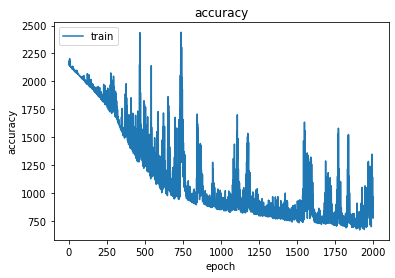

In [201]:
def plotHistory(history):
        plt.plot(history.history['loss'])
        plt.title('lossy')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
        
plotHistory(history)